 # **PyCaret: The Power of Low-Code Machine Learning**

# 1. Introduction

Over the recent years, the concept of low-code solutions has emerged as a transformative force. Low-code machine learning (ML) platforms empower developers and data scientists with tools that simplify complex ML workflows, reducing the need for extensive coding and allowing for rapid prototyping. One such powerful low-code tool is PyCaret, a Python library that seamlessly integrates into the ML pipeline, providing automated workflows, streamlined model selection, and intuitive visualization, thereby accelerating the development cycle and enabling data enthusiasts to focus more on the problem-solving aspect of data science. You can use it for a variety of applications including supervised and unsupervised learning and it covers a wide range of ML techniques **except Neural Networks**.

I am excited to explore its capabilities through the "predicting CO2 emissions in Rwanda" (Kaggle playground dataset in July 2023). Our objective is to predict "emission" levels in Rwanda using 75 input features, constituting a regression problem. For more information about the dataset, refer to this page: https://www.kaggle.com/competitions/playground-series-s3e20

## Install & Import Libraries

In [146]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Download Datasets

In [148]:
train = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")

print("train shape:", train.shape, "   test shape:", test.shape)
print()
train.head()

train shape: (79023, 76)    test shape: (24353, 75)



,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

In [149]:
df = train.copy()
unseen = test.copy()

# 2. Exploratory Data Analysis (EDA)

In this segment, we will perform a basic EDA to gain insights into the dataset. It's important to note that our focus here is to demonstrate the usage of PyCaret, so the EDA will be kept straightforward without delving too deep into intricate details.

## 2.1. Data Type, Unique Values, NULLs

First, we'll create a dataframe exploring types of data, number of unique values in each feature, and Number/percentage of Null values

In [150]:
d = {}
for col in df.columns:
    if col not in ["ID_LAT_LON_YEAR_WEEK", "emission"]:
        d[col] = []
        d[col].append(df[col].dtype)
        d[col].append(df[col].nunique())
        d[col].append(round(df[col].isnull().sum()/len(df[col])*100,2))
        d[col].append(df[col].isnull().sum())
    
dataset_info = pd.DataFrame(d)
dataset_info = dataset_info.rename(index={0:"data type", 1:"# unique values", 2:"% nulls", 3:"# nulls"})
dataset_info

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
data type,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
# unique values,452,453,3,53,64409,64411,64409,62367,64295,64218,64377,64376,64411,76718,76724,76707,72994,76596,76579,76638,76653,60693,60676,60688,60686,56556,60693,59817,55140,60621,60581,60679,60681,71733,71734,71736,70694,71722,71718,71603,71647,78484,78025,78479,78479,78480,78481,78475,78475,78475,78475,78313,78469,78470,78471,78472,439,439,439,433,433,434,436,78336,78538,78538,78538,78538,78538,78539,78538,78539,78539,78539
% nulls,0.0,0.0,0.0,0.0,18.49,18.49,18.49,18.49,18.49,18.49,18.49,18.49,18.49,2.69,2.69,2.69,2.69,2.69,2.69,2.69,2.69,23.18,23.18,23.18,23.18,23.18,23.18,23.18,23.18,23.18,23.18,23.18,23.18,9.21,9.21,9.21,9.21,9.21,9.21,9.21,9.21,0.68,0.68,0.68,0.68,0.68,0.68,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69,99.44,99.44,99.44,99.44,99.44,99.44,99.44,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61
# nulls,0,0,0,0,14609,14609,14609,14609,14609,14609,14609,14609,14609,2122,2122,212

As you see, we have 7 input features that over 99% of them are missing. The following code lists input features with over 50% missing values. we won't use them in our analysis by **ignoring** them in Pycaret code.

In [151]:
columns_with_high_missing_values = df.columns[df.isnull().mean() > 0.5]

print("columns with over 50% missing values:")
print(columns_with_high_missing_values)

columns with over 50% missing values:
Index(['UvAerosolLayerHeight_aerosol_height',
       'UvAerosolLayerHeight_aerosol_pressure',
       'UvAerosolLayerHeight_aerosol_optical_depth',
       'UvAerosolLayerHeight_sensor_zenith_angle',
       'UvAerosolLayerHeight_sensor_azimuth_angle',
       'UvAerosolLayerHeight_solar_azimuth_angle',
       'UvAerosolLayerHeight_solar_zenith_angle'],
      dtype='object')


In [87]:
print(df.shape)
print(unseen.shape)

(79023, 69)
(24353, 68)


## 2.2. Time of the Year Matters

Now, we explore level of emission in different weeks. I provided it in Seaborn and Matplotlib versions

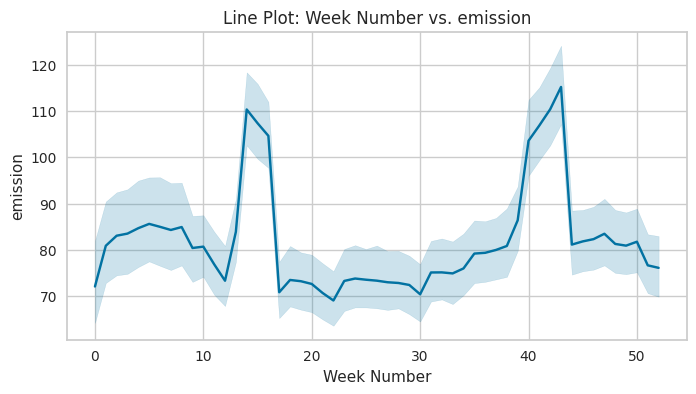

In [88]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='week_no', y='emission', data=df)
plt.title('Line Plot: Week Number vs. emission')
plt.xlabel('Week Number')
plt.ylabel('emission')
plt.show()

### The matplotlib version:

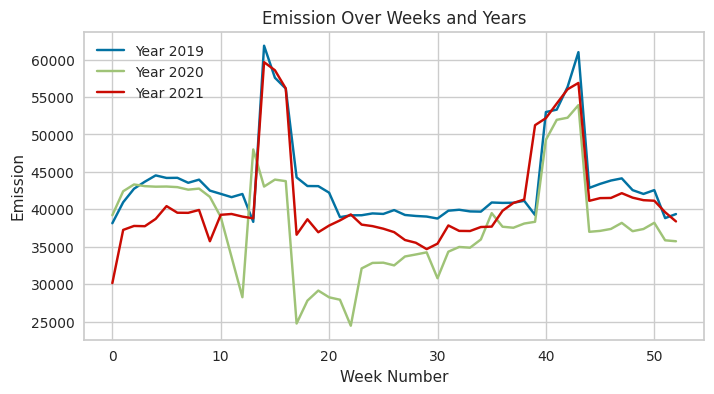

In [89]:
grouped_df = df.groupby(['year', 'week_no'])['emission'].sum().reset_index()

# Creating a line chart
plt.figure(figsize=(8, 4))
for year in grouped_df['year'].unique():
    year_data = grouped_df[grouped_df['year'] == year]
    plt.plot(year_data['week_no'], year_data['emission'], label=f'Year {year}')

plt.xlabel('Week Number')
plt.ylabel('Emission')
plt.title('Emission Over Weeks and Years')
plt.legend()
plt.grid(True)
plt.show()


## 2.3. Duplicates

checking if there are any duplicates in the dataset

In [90]:
print("number of duplicates in train dataset:", df.duplicated().sum())
print("number of duplicates in unseen dataset:", unseen.duplicated().sum())

number of duplicates in train dataset: 0
number of duplicates in unseen dataset: 0


## 2.4. Visualizing the Emission Level by Location

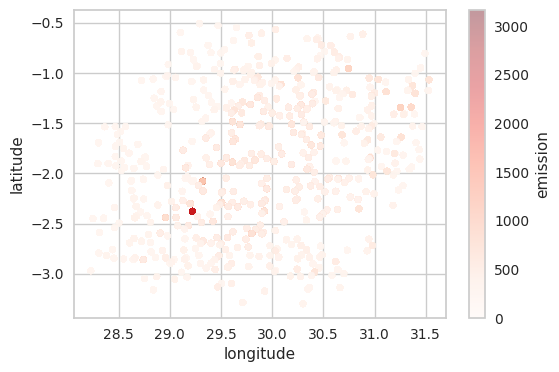

In [91]:
df.plot(kind="scatter", x="longitude", y="latitude",
        c="emission", cmap=plt.get_cmap("Reds"),
        colorbar=True, alpha=0.4, figsize=(6,4),
        )
plt.show()

it appears that location has an important role in predicting the emission level

# 3. Data Preparation & Pre-processing

In Pycaret, you don't need to do extensive coding. In the following code we will:
* Do preprocessing using minmax scaler and 5-fold cross validation.
* Ignore some features (I don't want to use the ID in my analysis). 
* Use Median for numeric imputation and Mode for categorical imputation
* train dataset size= 0.7

I'll do all the steps in **one line** of code.

**Note:** I skipped feature transformation and feature selection steps.


In [157]:
type(columns_with_high_missing_values)

pandas.core.indexes.base.Index

In [158]:
from pycaret.regression import *

features_to_drop = ["ID_LAT_LON_YEAR_WEEK"] + list(columns_with_high_missing_values)
reg = setup(data=df, 
            target="emission", 
            session_id=123,
            fold=5,
            ignore_features=features_to_drop,
            #ordinal_features=ordinal_features,
            #numeric_features=numeric_features,
            #categorical_features=categorical_features,            
            #remove_outliers=True, outliers_method="iforest", outliers_threshold=0.05,
            normalize=True, normalize_method="minmax",
            numeric_imputation="median", 
            categorical_imputation="mode",
            #fix_imbalance = True, # it uses SMOTE
            #transform_target = True,
            #polynomial_features = True, polynomial_degree=3,
            #bin_numeric_features = ['week_no'],
            #rare_to_value = 0.1,
            #feature_selection = True, feature_selection_method= 'classic', feature_selection_estimator= 'lightgbm', n_features_to_select= 0.2,
            #remove_multicollinearity=True, multicollinearity_threshold=0.9,
            #pca=True, pca_method="linear", pca_components=0.999,
            train_size=0.7, #data_split_shuffle=True, data_split_stratify=True,            
           )

,Description,Value
0,Session id,123
1,Target,emission
2,Target type,Regression
3,Original data shape,"(79023, 76)"
4,Transformed data shape,"(79023, 68)"
5,Transformed train set shape,"(55316, 68)"
6,Transformed test set shape,"(23707, 68)"
7,Ignore features,8
8,Numeric features,67
9,Rows with missing values,99.4%


**there are more methods in Pycaret which help you perform preprocessing:**

- you can create a list of ordinal features (ordinal_features = {'salary' : ['low', 'medium', 'high']}), categorical features and numerical features
- fix imbalance dataset using SMOTE
- Remove Outliers through 'iforest' (Uses sklearn's IsolationForest), 'ee'(Uses sklearn's EllipticEnvelope), 'lof'(Uses sklearn's LocalOutlierFactor)
- Conduct feature transformation using ‘yeo-johnson’ or 'quantile'
- transform the target variable
- Feature Engineering through polynomial degree: Sometimes the relationship between dependent and independent variables is more complex. Creating new polynomial features sometimes might help in capturing that relationship, which otherwise may go unnoticed.
- Group Features: When dataset contains features that are related to each other in someway, for example: features recorded at some fixed time intervals, then new statistical features such as mean, median, variance and standard deviation for a group of such features can be created from existing features using group_features parameter.
- Bin numeric features
- Combine Rare Levels: Minimum fraction of category occurrences in a categorical column. If a category is less frequent than rare_to_value * len(X), it is replaced with the string in rare_value.
- Feature Selection: feature_selection_method: ['classic', 'univariate', 'sequential'], feature_selection_estimator= 'lightgbm', n_features_to_select: [int or float, default = 0.2]
- Remove Multicollinearity
- Ignore Low Variance: Sometimes a dataset may have a categorical feature with multiple levels, where distribution of such levels are skewed and one level may dominate over other levels. This means there is not much variation in the information provided by such feature.  For a ML model, such feature may not add a lot of information and thus can be ignored for modeling.
- Apply PCA with target percentage for information retention or number of components

Let's assume that you'd like to call your transformed dataset. you need to do it through **get_config()**. First, let's see what other features are available to us through this function.

In [93]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

Let's take a look at our transformed train dataset after applying all the transformations on df

In [160]:
get_config("train_transformed").head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
17129,0.744353,0.499092,1.0,0.192308,0.098806,0.314095,0.108411,0.562974,0.838818,0.686403,0.407226,0.139218,0.357899,0.224589,0.137512,0.410963,0.453284,0.651440,0.597308,0.425000,0.301603,0.234045,0.188793,0.397279,0.263240,1.137698e-01,0.412054,0.089421,0.350441,0.842062,0.534443,0.423082,0.205054,0.378299,0.332289,0.550027,0.302603,0.130891,0.407142,0.686403,0.891015,0.392720,0.457208,0.428360,0.667053,0.449756,0.251395,0.562617,0.377673,0.430403,0.701983,0.525399,0.428324,0.672493,0.448685,0.251348,0.589221,0.347445,0.542914,0.405918,0.499735,0.023165,0.321493,0.337831,0.739866,0.417326,0.349020,143.860703
72484,0.150592,0.724274,1.0,0.634615,0.195216,0.344879,0.176694,0.540943,0.554057,0.571005,0.565806,0.574835,0.404995,0.382883,0.106330,0.463007,0.659391,0.651493,0.588407,0.786946,0.520802,0.246329,0.198893,0.415970,0.335136,2.276290e-01,0.458027,0.119205,0.570257,0.552023,0.557878,0.557021,0.593070,0.305912,0.220414,0.446222,0.426224,0.290626,0.898835,0.980942,0.884280,0.584707,0.664954,0.426387,0.590195,0.806382,0.501400,0.673713,0.317116,0.400688,0.646988,0.683216,0.426351,0.596103,0.805996,0.501369,0.689842,0.532515,0.347068,0.623486,0.283894,0.086850,0.209099,0.429646,0.599556,0.775316,0.526031,131.148422
28881,0.632843,0.647094,0.5,0.942308,0.195216,0.344879,0.176694,0.540943,0.554057,0.571005,0.565806,0.574835,0.404995,0.255932,0.199597,0.407717,0.709120,0.165493,0.708542,0.214740,0.845827,0.246329,0.198893,0.415970,0.335136,2.276290e-01,0.458027,0.119205,0.570257,0.552023,0.557878,0.557021,0.593070,0.350984,0.350851,0.516377,0.408835,0.577668,0.553636,0.614824,0.524299,0.448951,0.555832,0.402991,0.735777,0.189187,0.785310,0.481089,0.534274,0.567116,0.675799,0.676484,0.402957,0.740800,0.187615,0.785296,0.679188,0.514295,0.380948,0.592470,0.32753

As you see, "**year**" was transformed numerically. I'd like to apply one-hot-encoding on it. so I define it as a categorical feature 

In [161]:
from pycaret.regression import *

categorical_features = ['year']

reg_2 = setup(data=df, 
            target="emission", 
            session_id=123,
            fold=5,
            ignore_features=["ID_LAT_LON_YEAR_WEEK"],
            #ordinal_features=ordinal_features,
            #numeric_features=numeric_features,
            categorical_features=categorical_features,            
            #remove_outliers=True, outliers_method="iforest", outliers_threshold=0.05,
            normalize=True, normalize_method="minmax",
            numeric_imputation="median", 
            categorical_imputation="mode",
            #fix_imbalance = True, # it uses SMOTE
            #transform_target = True,
            #polynomial_features = True, polynomial_degree=3,
            #bin_numeric_features = ['week_no'],
            #rare_to_value = 0.1,
            #feature_selection = True, feature_selection_method= 'classic', feature_selection_estimator= 'lightgbm', n_features_to_select= 0.2,
            #remove_multicollinearity=True, multicollinearity_threshold=0.9,
            #pca=True, pca_method="linear", pca_components=0.999,
            train_size=0.7, #data_split_shuffle=True, data_split_stratify=True,            
           )

get_config("train_transformed").head()

,Description,Value
0,Session id,123
1,Target,emission
2,Target type,Regression
3,Original data shape,"(79023, 76)"
4,Transformed data shape,"(79023, 77)"
5,Transformed train set shape,"(55316, 77)"
6,Transformed test set shape,"(23707, 77)"
7,Ignore features,1
8,Numeric features,73
9,Categorical features,1


,latitude,longitude,year_2021.0,year_2020.0,year_2019.0,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
17129,0.744353,0.499092,1.0,0.0,0.0,0.192308,0.098806,0.314095,0.108411,0.562974,0.838818,0.686403,0.407226,0.139218,0.357899,0.224589,0.137512,0.410963,0.453284,0.651440,0.597308,0.425000,0.301603,0.234045,0.188793,0.397279,0.263240,1.137698e-01,0.412054,0.089421,0.350441,0.842062,0.534443,0.423082,0.205054,0.378299,0.332289,0.550027,0.302603,0.130891,0.407142,0.686403,0.891015,0.392720,0.457208,0.428360,0.667053,0.449756,0.251395,0.562617,0.377673,0.430403,0.701983,0.525399,0.428324,0.672493,0.448685,0.251348,0.267983,0.664321,0.385813,0.444177,0.967077,0.802871,0.538128,0.589221,0.347445,0.542914,0.405918,0.499735,0.023165,0.321493,0.337831,0.739866,0.417326,0.349020,143.860703
72484,0.150592,0.724274,1.0,0.0,0.0,0.634615,0.195216,0.344879,0.176694,0.540943,0.554057,0.571005,0.565806,0.574835,0.404995,0.382883,0.106330,0.463007,0.659391,0.651493,0.588407,0.786946,0.520802,0.246329,0.198893,0.415970,0.335136,2.276289e-01,0.458027,0.119205,0.570257,0.552023,0.557878,0.557021,0.593070,0.305912,0.220414,0.446222,0.426224,0.290626,0.898835,0.980942,0.884280,0.584707,0.664954,0.426387,0.590195,0.806382,0.501400,0.673713,0.317116,0.400688,0.646988,0.683216,0.426351,0.596103,0.805996,0.501369,0.267983,0.664321,0.385813,0.444177,0.967077,0.802871,0.538128,0.689842,0.532515,0.347068,0.623486,0.283894,0.086850,0.209099,0.429646,0.599556,0.775316,0.526031,131.148422
28881,0.632843,0.647094,0.0,1.0,0.0,0.942308,0.195216,0.344879,0.176694,0.540943,0.554057,0.571005

"year" is one-hot-encoded now!

# 4. Training the Model

## 4.1. Comparing Models

In this section I'm comparing 5 models. The models performance will be sorted by RMSE.

In [96]:
models_to_compare = ['svm', 'knn', "ridge", "dt", "catboost"] 
best_model = compare_models(models_to_compare, sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,16.3552,807.5613,28.3385,0.9604,0.8882,16.0710,22.0040
dt,Decision Tree Regressor,10.6045,1015.6511,31.7776,0.9505,0.2099,0.1607,6.2680
ridge,Ridge Regression,69.2683,19980.0227,141.2694,0.0272,1.8296,75.3231,1.1400
svm,Support Vector Regression,62.0097,21063.3055,145.0500,-0.0256,1.5333,38.6001,244.8480
knn,K Neighbors Regressor,68.6908,21931.5117,148.0348,-0.0688,1.6814,59.9619,5.2800


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

## 4.2. Hyperparameter Tuning in Pycaret

In this step, we'll create a **lightgbm** model and will do hyperparameter tuning using **optuna**

In [162]:
lightgbm = create_model('lightgbm', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

As you see, there is not a big gap between the RMSE mean in Train and Validation datasets. It appears that we are not dealing with overfitting problem.

In [163]:
tuned_lightgbm = tune_model(lightgbm, 
                            search_library = 'optuna', 
                            choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,33.6121,3865.8267,62.1758,0.8134,1.4267,42.3786
1,33.3750,4024.9749,63.4427,0.8071,1.4301,44.0736
2,33.2160,3323.1735,57.6470,0.8237,1.4319,42.2998
3,33.4553,3949.6679,62.8464,0.7967,1.4496,39.5596
4,33.6388,4041.0525,63.5693,0.8229,1.4191,45.4361
Mean,33.4594,3840.9391,61.9362,0.8128,1.4315,42.7495
Std,0.1561,266.2469,2.2009,0.0101,0.0100,1.9742


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-10-25 14:41:50,532] Searching the best hyperparameters using 55316 samples...


[LightGBM] [Warning] bagging_fraction is set=0.7652999331582643, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7652999331582643
[LightGBM] [Warning] feature_fraction is set=0.8790777461844856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8790777461844856
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.4701816229732594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4701816229732594
[LightGBM] [Warning] feature_fraction is set=0.9407120421387937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9407120421387937
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.5896709169048127, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5896709169048127
[LightGBM] [Warning] feature_fracti

[I 2023-10-25 14:48:43,458] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## 4.3. Model Outputs

I can have a wide range of outputs in Pycaret from pipeline and feature importance to learning curves and list of hyperparameters

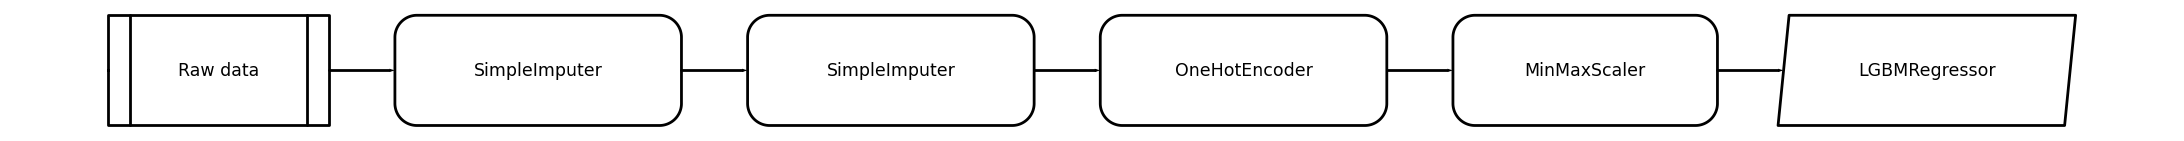

In [99]:
evaluate_model(tuned_lightgbm)

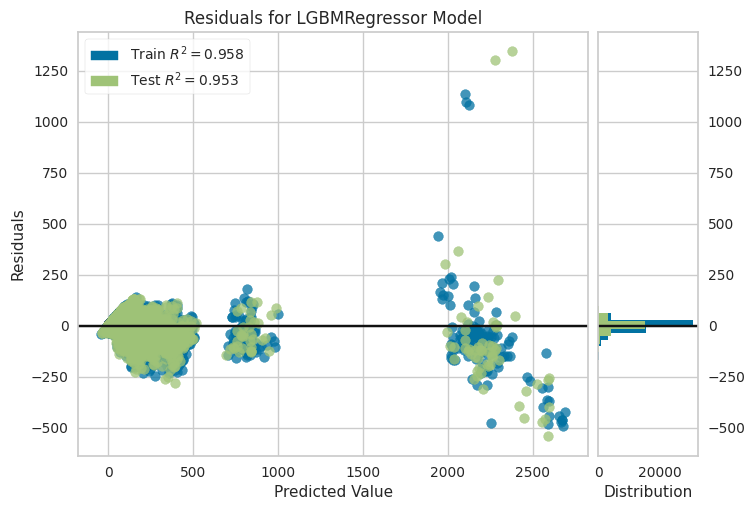

In [127]:
plot_model(tuned_lightgbm)

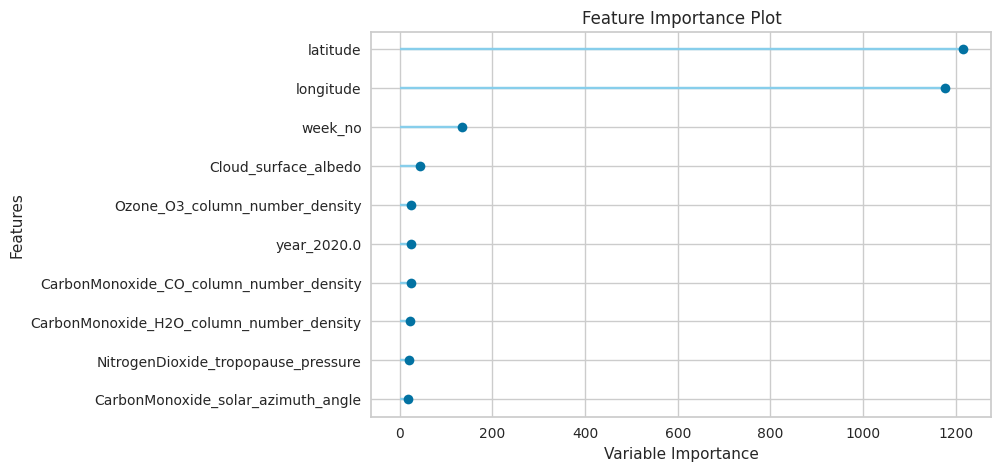

In [164]:
#Feature Importance (Top 10)
plot_model(tuned_lightgbm, plot ='feature')

As we predicted in the EDA, location has an important role in predicting the emission.
Also, another EDA showed that during certain times of the year, we have a higher level of emission

In [165]:
plot_model(tuned_lightgbm, plot ='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [166]:
finalize_model(tuned_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['latitude', 'longitude', 'week_no',
                                             'SulphurDioxide_SO2_column_number_density',
                                             'SulphurDioxide_SO2_column_number_density_amf',
                                             'SulphurDioxide_SO2_slant_column_number_density',
                                             'SulphurDioxide_cloud_fraction',
                                             'SulphurDioxide_sensor_azimuth_angle',
                                             'SulphurDioxid...
                 TransformerWrapper(include=['year'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['year'],
                                    transformer=OneHotEncoder(cols=['year'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator', LGBMRegressor(random_state=123))])

## 4.4. Predict Test Set

In [167]:
test_set = get_config("X_test")
predict_testset = predict_model(tuned_lightgbm, data=test_set)

In [168]:
from sklearn.metrics import mean_squared_error

test_rmse = mean_squared_error(get_config("test_transformed")["emission"], 
                               predict_testset["prediction_label"])
print("RMSE in test set=",np.sqrt(test_rmse))

RMSE in test set= 31.63966715352405


## 4.5. Predict Unseen Data

In [184]:
pipeline = finalize_model(tuned_lightgbm)
predictions = predict_model(pipeline, data=unseen)

In [186]:
predictions.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,prediction_label
0,ID_-0.510_29.290_2022_00,-0.51,29.290001,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.0000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583,-2.529385
1,ID_-0.510_29.290_2022_01,-0.51,29.290001,2022,1,0.000456,0.691164,0.000316,0.000000,76.239197,15.600607,-140.529846,28.896124,0.000157,0.037641,1688.656372,2814.309570,829652.9375,26.072166,25.189548,-142.612640,28.318922,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.1250,76.239197,15.600607,-140.529846,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529846,15.600607,76.239197,-0.823662,829753.0625,-0.009998,34.745541,-139.171036,30.405075,0.112643,2.537305,0.290184,228.489212,0.515679,-0.009998,34.745541,-139.171036,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.738281,6476.147461,54915.707031,5476.146973,11.448438,0.293119,-30.510319,42.402592,-138.632828,31.012381,3.966274
2,ID_-0.510_29.290_2022_02,-0.51,29.290001,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055340,39.889061,-136.908981,30.054682,0.000053,0.037795,2629.692139,3233.655029,829590.0000,14.881259,40.833580,-143.949341,26.760220,0.0

Our model predictions are saved in "**prediction_label**" column

# 5. Ensemble of Models in Pycaret

We have 2 methods in Pycaret: **Blend_models** and **Ensemble_model**. 

* ensemble_model function in PyCaret is used to create an ensemble of multiple base models. It takes a trained base model (a model that has been trained and tuned using PyCaret) and combines it with other models to create an ensemble. PyCaret automatically selects a set of diverse models based on the base model's family and combines them to boost the overall performance. This function is typically used for improving model accuracy by leveraging the strength of different algorithms.

* blend_models function in PyCaret is used to create a blended ensemble of multiple base models. Unlike ensemble_model, blend_models takes a list of trained base models and combines their predictions on the hold-out set to create an ensemble. This function is typically used when you want to blend predictions from multiple models at the prediction level.

**Key Differences:**
- ensemble_model takes a single base model and automatically selects diverse models to create an ensemble, while blend_models takes a list of trained models provided by the user.
- ensemble_model is used for creating ensembles using boosting, bagging, or stacking techniques with a single base model, whereas blend_models creates a blend of predictions from multiple models at the prediction level.
- ensemble_model is useful when you have a specific base model and want to improve its performance, while blend_models is useful when you have multiple models and want to blend their predictions to create an ensemble.
- Both functions are powerful tools in PyCaret for creating ensemble models, and the choice between them depends on your specific use case and the models you have trained or selected.

Let's create an ensemble of different models

In [170]:
dt = create_model('dt', fold=5, verbose=False)

knn = create_model('knn', fold=5, verbose=False)

blended_model = blend_models(estimator_list=[tuned_lightgbm, dt, knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.3442,3279.8825,57.2703,0.8417,1.1950,27.3001
1,28.9937,3508.0377,59.2287,0.8319,1.2008,29.5260
2,28.3225,2887.3749,53.7343,0.8468,1.1831,24.6579
3,29.1072,3487.6640,59.0564,0.8205,1.2217,26.8851
4,29.4431,3703.7279,60.8583,0.8377,1.1891,29.8701
Mean,29.0421,3373.3374,58.0296,0.8357,1.1979,27.6478
Std,0.3941,277.5846,2.4298,0.0090,0.0133,1.9031


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [182]:
print(type(blended_model))

<class 'sklearn.ensemble._voting.VotingRegressor'>


# 6. Interpret a Model
This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations)

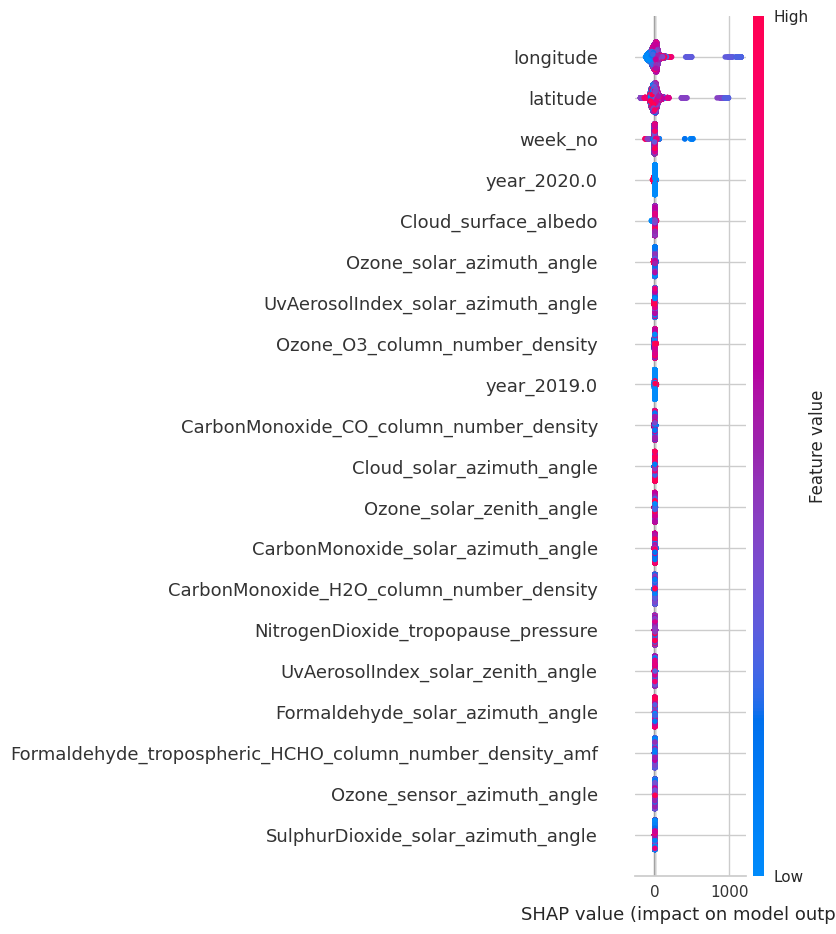

In [187]:
interpret_model(tuned_lightgbm)

### change the plot type

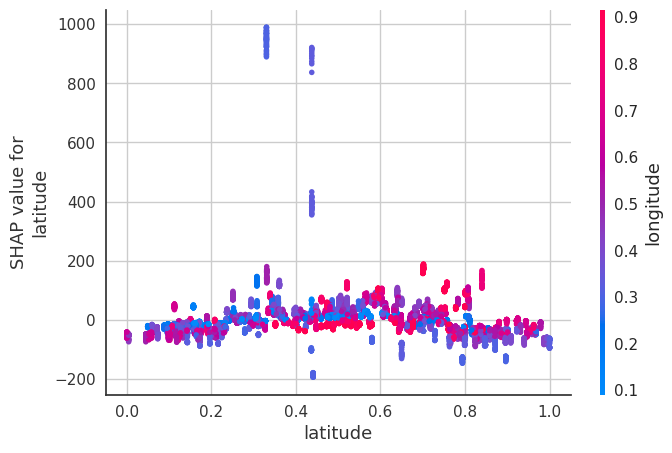

In [188]:
interpret_model(tuned_lightgbm, plot = 'correlation')

### Reason Plot

In [193]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 1)

## Dashboard

In [ ]:
dashboard(tuned_lightgbm)

# 7. Fairness
For those who are interested in fairness and bias, Pycaret has provided fairness related metrics to analyze which groups of individuals are at risk for experiencing harm. I provided an example in this section, but it's not the case in my code, as I'm not using any socio-demographic features in this analysis

In [ ]:
#lr_fairness = check_fairness(tuned_lightgbm, sensitive_features = ['sex', 'race'])

# 8. Save a Model

In [189]:
save_model(tuned_lightgbm, 'tuned_lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['latitude', 'longitude', 'week_no',
                                              'SulphurDioxide_SO2_column_number_density',
                                              'SulphurDioxide_SO2_column_number_density_amf',
                                              'SulphurDioxide_SO2_slant_column_number_density',
                                              'SulphurDioxide_cloud_fraction',
                                              'SulphurDioxide_sensor_azimuth_angle',
                                              'SulphurDioxid...
                 ('categorical_imputer',
                  TransformerWrapper(include=['year'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['year'],
                                     transformer=On

# 9. Deploy a Model
This function deploys the entire ML pipeline on the cloud:

In [ ]:
deploy_model(tuned_lightgbm, model_name = 'tuned_lightgbm_aws', platform = 'aws', authentication = { 'bucket'  : 'pycaret-test' })

# 10. Load a Model
This function loads a previously saved pipeline:

In [ ]:
# loading the saved model
load_model('tuned_lightgbm')

# 11. Create API

In [175]:
create_api(dt, 'dt_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python dt_api.py


# 12. Conclusion

PyCaret stands as a powerful and user-friendly tool that simplifies the machine learning workflow, making it accessible to data scientists. With its extensive library support, automated processes for data preprocessing, feature selection, model training, and hyperparameter tuning, PyCaret enables rapid prototyping and experimentation. Its intuitive interface allows users to focus on understanding their data and experimenting with various machine learning models effortlessly. Whether you're a novice aiming to explore the world of data science or an expert seeking to streamline your workflow, PyCaret's efficiency and versatility make it an invaluable asset, enabling faster model development and informed decision-making in the realm of machine learning.